In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from matplotlib.patches import Polygon
import os

In [2]:
dataDir='../..'

train_data='train2017'
train_ann='{}/annotations/instances_{}.json'.format(dataDir, train_data)
val_data='val2017'
val_ann='{}/annotations/instances_{}.json'.format(dataDir,val_data)

In [3]:
# initialize COCO api for instance annotations
# coco=COCO(train_ann)
coco = COCO(val_ann)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

super_cats = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(super_cats)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor animal appliance accessory furniture sports food electronic person outdoor kitchen vehicle


In [5]:
category = ['plant']
print(type(category[0]))
# print(len(nms))

<class 'str'>


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=category)
imgIds = coco.getImgIds(catIds=catIds )
print(len(imgIds))

5000


[397133]
{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}
[37777]
{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}
[252219]
{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg', 'id': 252219}
[87038]
{'license': 1, 'file_name': '000000087038.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000087038.jpg', 'heigh

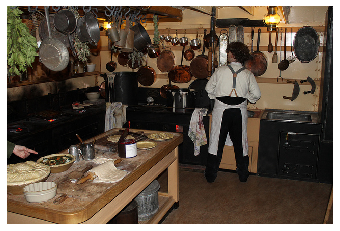

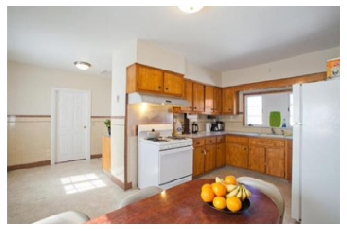

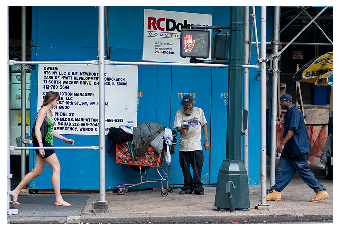

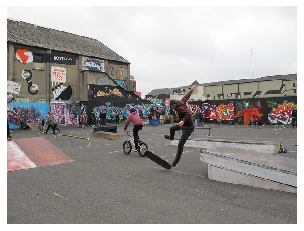

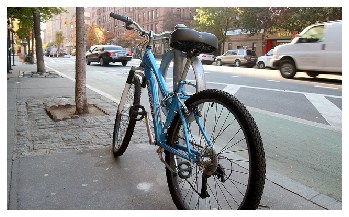

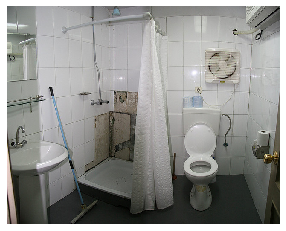

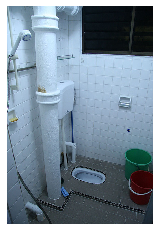

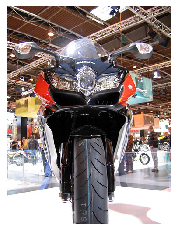

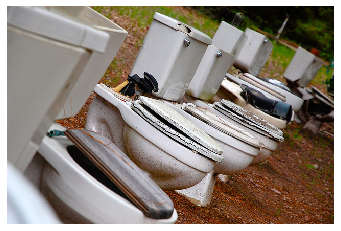

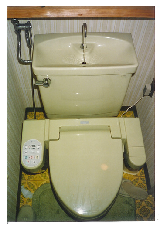

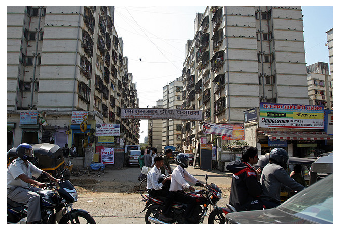

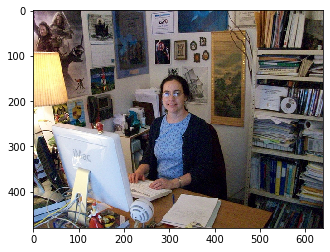

In [7]:
for i in range(12):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
    print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,val_data,img['file_name']))
#     I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.figure(i+1)
    plt.imshow(I)
    
plt.show()

[397133]
{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}
[37777]
{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}
[252219]
{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg', 'id': 252219}
[87038]
{'license': 1, 'file_name': '000000087038.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000087038.jpg', 'heigh

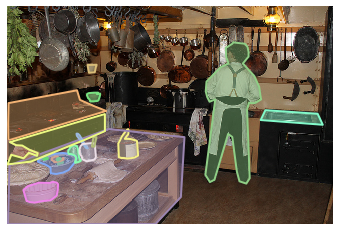

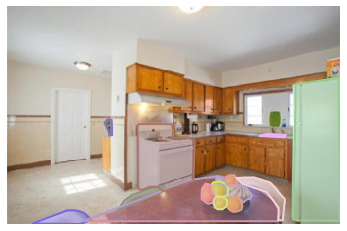

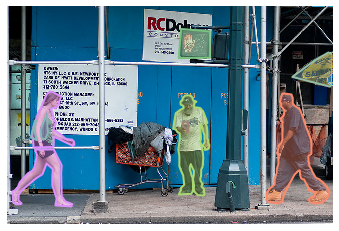

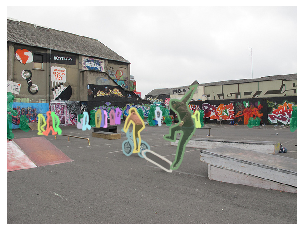

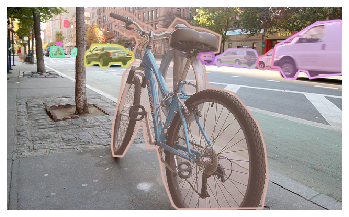

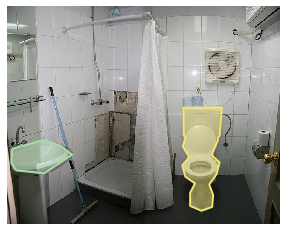

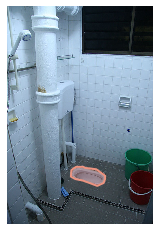

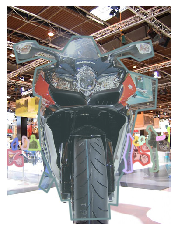

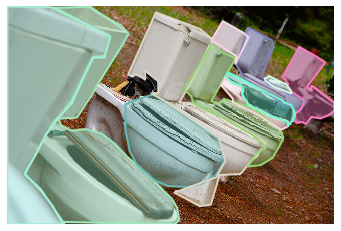

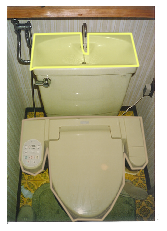

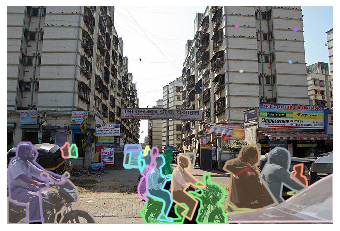

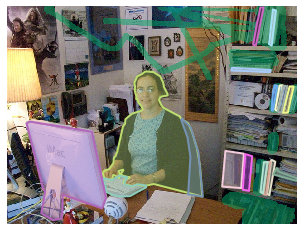

In [8]:
for i in range(12):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
    print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,val_data,img['file_name']))
#     I = io.imread(img['coco_url'])
    plt.figure(i+1)
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    conts = coco.showAnns(anns)

17
1
(17,)
(2,)


error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/shapedescr.cpp:274: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'contourArea'


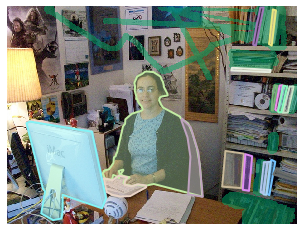

In [34]:
plt.figure(i+1)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
conts = coco.showAnns(anns)

print(len(conts))

conts = np.asarray(conts)
# cnts = sorted(conts, key = cv2.contourArea, reverse=True)[:3]
# print(cnts.shape)

# print(conts)
print(conts.ndim)
print(conts.shape)


if conts.shape[0]==1:
    cnt=conts
else:
    
    conts = np.reshape(conts, (conts.shape[0],1))
#     print(conts.shape)
    cnt = conts[0]
    
cnts = []
for i in range(conts.shape[0]):
    cnts.append(conts[i][0])

cnts = np.asarray(cnts)
print(cnts[0][0].shape)
print(cv2.contourArea(cnts[0]))
areas=[]

for i in range(5):
    print(cv2.contourArea(cnts[i]))

print(cnt[0].shape)
# print(cnt)
cnt = np.asarray(cnt)
# print(cnt)



# cv2.drawContours(I, np.int32([cnt[0]]), -1, (255, 255, 255), -1)

plt.axis('off')
plt.imshow(I)
plt.show()
# io.imsave('forged_image.png', I)

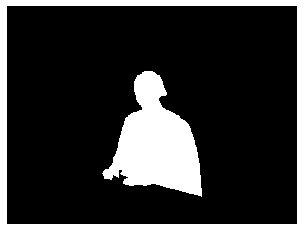

In [10]:
black_image = np.zeros(I.shape, np.uint8)
plt.figure()
# plt.imshow(black_image)
cv2.drawContours(black_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
plt.axis('off')
plt.imshow(black_image)
plt.show()
# io.imsave('mask_forged_inverse.png', black_image)

18


(-0.5, 639.5, 479.5, -0.5)

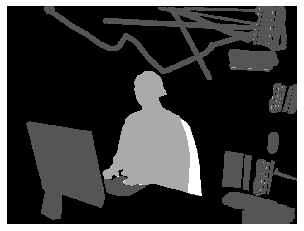

In [11]:
mask = coco.annToMask(anns[0])
print(len(anns))
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')

18


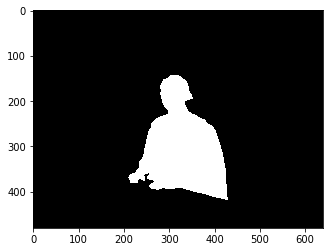

In [14]:
print(len(anns))
mask = coco.annToMask(anns[0])
# print(mask)
plt.imshow(mask, cmap=plt.cm.gray) 
# new_mask = cv2.resize(mask, (256, 256))
# plt.imsave('check_size.png', new_mask, cmap=plt.cm.gray)

In [ ]:
from skimage.transform import resize
import cv2
import os

    
counter = 0
   

for i in range(15):
    imgId = coco.getImgIds(imgIds=imgIds[i])
    img = coco.loadImgs(imgIds[i])[0]



    I = io.imread('%s/%s/%s'%(dataDir,val_data,img['file_name']))
    
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    conts = coco.showAnns(anns)
    blck_image = np.zeros(I.shape, np.uint8)

    conts = np.asarray(conts)
    
    print(imgId[0])
    print(conts.shape)
    
    if (conts.ndim==3 and conts.shape[0]!=1):
        cnt = conts[0]
        cnt = np.asarray(cnt)
#         cv2.drawContours(I, np.int32([cnt]), -1, (0,0,0), -1)
        cv2.drawContours(I, np.int32([cnt]), -1, (255, 255, 255), -1)
        cv2.drawContours(blck_image, np.int32([cnt]), -1, (255, 255, 255), -1)
    
    elif (conts.ndim==3 and conts.shape[0]==1):
        cnt=conts
        cnt = np.asarray(cnt)
        cv2.drawContours(I, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
        cv2.drawContours(blck_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
        
        
    elif (conts.ndim==1):
        if conts.shape[0]==1:
            cnt=conts
        else:
            conts = np.reshape(conts, (conts.shape[0],1))
            cnt = conts[0]
        cnt = np.asarray(cnt)


#         cv2.drawContours(I, np.int32([cnt[0]]), -1, (0,0,0), -1)
        cv2.drawContours(I, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
        cv2.drawContours(blck_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
        
    

    blck_resize = cv2.resize(blck_image, (256, 256))
    
    
    counter+=1
    
    
#     cv2.drawContours(I, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
    I_resize = cv2.resize(I, (256, 256))
    
    
    #     Original Image save
    io.imsave(str(imgId[0]) +'.png', I_resize)
#         io.imsave(ims + specific_category + '_' +str(imgId[0]) + '.png', I_resize)
    # #     Masked Image save
    io.imsave('mask_' + str(imgId[0]) + '.png', blck_resize) 


    #     plt.figure(i+1)
    #     fig, axes = plt.subplots(ncols=2, nrows=2)
    #     ax = axes.ravel()

    #     ax[0].set_title('Original Image')
    #     ax[0].imshow(I)

    #     ax[1].set_title('Masked')
    #     ax[1].imshow(I)



    

print(counter)